#### Comparativo de Velocidade de Processamento Entre Python e C para um mesmo problema matemático

O objetivo dessa análise é realizar um comparativo entre um problema de cálculo de divisores de um determinado valor. O usuário entra com um determinado valor, e dentro de um loop, que parte de 1 até o valor, o algorimo calcula se o próximo valor da interação e divisor desse valor limite.

Isso não significa que uma linguagem seja melhor que outra. Python e C possuem propostas de usabilidade diferente para cada uma delas. Cada uma atende o seu público e são extremamente importantes no contexto geral da computação.


- O código em Python

In [ ]:
import time as tm
import pandas as pd
x = int(input("Entre com o Valor: "))
interacao = []
inicio = tm.time()
tempo =[]
inter = 0

for i in range(1, x+1):
    interacao.append(i-1)
    agora = tm.time()
    tempo.append(round(agora-inicio,2))
    if x % i == 0:
        print(i)

curva_interacao = pd.DataFrame({'Tempo de Processamento':tempo, 'Interacoes': interacao})
curva_interacao.to_csv("processamento.csv",index=False)

- O código em C

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
    int x, i;
    clock_t inicio;
    double tempo;
    int *interacao;
    double *tempos;

    printf("Entre com o Valor: ");
    scanf("%d", &x);

    interacao = (int*)malloc(x * sizeof(int));
    tempos = (double*)malloc(x * sizeof(double));

    inicio = clock();

    for (i = 1; i <= x; i++) {
        interacao[i - 1] = i - 1;
        tempo = (double)(clock() - inicio) / CLOCKS_PER_SEC;
        tempos[i - 1] = tempo;

        if (x % i == 0) {
            printf("%d\n", i);
        }
    }

    FILE *fp;
    fp = fopen("processamento.csv", "w");
    fprintf(fp, "Tempo de Processamento,Interacoes\n");
    for (i = 0; i < x; i++) {
        fprintf(fp, "%.2f,%d\n", tempos[i], interacao[i]);
    }
    fclose(fp);

    free(interacao);
    free(tempos);

    return 0;
}


O teste foi realizado em um computador com um Processador Ryzen 5 4600 G com 16 GB de 3200 MHz

Foi solicitado em ambos os programas, o cálculo de divisores de 10^7

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df_python = pd.read_csv("processamento_py.csv")
df_c = pd.read_csv("processamento_c.csv")

In [19]:
# Tamanho da Base de Dados
comc = len(df_c)
compy =len(df_python)
print(comc,compy)

10000000 10000000


In [20]:
# Tempo Levado para Chegar no Resultado (Em Segundos)

max_c = max(df_c["Tempo de Processamento_C"])
max_py = max(df_python["Tempo de Processamento_Python"])
print(f'Em C Levou: {max_c}, em Python Levou: {max_py}')

Em C Levou: 0.17, em Python Levou: 16.01


In [21]:
percentual = (max_c/max_py)*100
print(percentual)

1.061836352279825


C levou 1% do tempo necessário de Python para realizar o resultado.

#### A partir de quantas interações, as linguagens divergiram de tempo?

Vamos realizar a plotagem dos valores e avaliar o ponto de divergência

In [22]:
unificado = pd.merge(df_c,df_python)

In [25]:
unificado.head(5)

,Tempo de Processamento_C,Interacoes,Tempo de Processamento_Python
0,0.0,0,0.0
1,0.0,1,0.0
2,0.0,2,0.0
3,0.0,3,0.0
4,0.0,4,0.0


In [29]:
tempo_c = unificado["Tempo de Processamento_C"]
tempo_py = unificado["Tempo de Processamento_Python"]
x = unificado["Interacoes"]

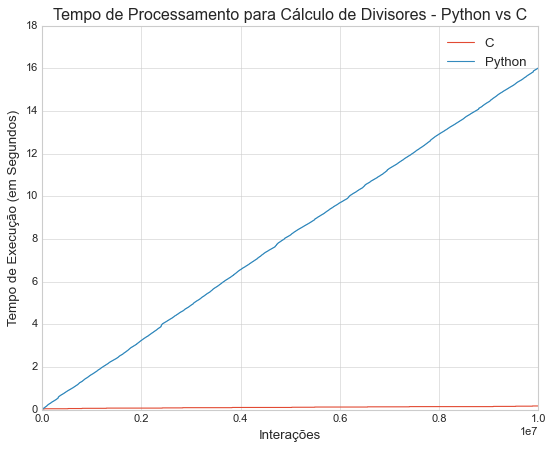

In [50]:
# Plot

plt.plot(x,tempo_c)
plt.plot(x,tempo_py)
plt.xlabel("Interações")
plt.ylabel("Tempo de Execução (em Segundos)")
plt.style.use(style="seaborn-v0_8-whitegrid")
plt.title("Tempo de Processamento para Cálculo de Divisores - Python vs C")
plt.legend(["C","Python"]) 
plt.show()

Conclusões:

O uso de uma linguagem ou outra vai depender da necessidade e uso. Python se mantém prático para o uso em análise de dados ou aplicações de aprendizagem de máquina, e C se mantém usual para grandes cálculos e programação com dispositivos como microcontroladores. 